In [79]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [80]:
os.chdir('C:\\Users\\tsekourash\\Desktop\\eydap')

In [81]:
df = pd.read_csv("concat_data.csv")
print(df.shape)
df.head(5)

(62917, 8)


,Date,Value,isCovid,isHoliday,isChristmas,isWeekday,isSummer,index
0,2020-03-13 00:00:00,1.22,1,0,0,1,0,1
1,2020-03-14 00:00:00,1.33,1,0,0,0,0,1
2,2020-03-15 00:00:00,0.20,1,0,0,0,0,1
3,2020-03-16 00:00:00,0.07,1,0,0,1,0,1
4,2020-03-17 00:00:00,1.07,1,0,0,1,0,1


In [82]:
df["Date"]=pd.to_datetime(df["Date"])
print(df.shape)
df.head(5)

(62917, 8)


,Date,Value,isCovid,isHoliday,isChristmas,isWeekday,isSummer,index
0,2020-03-13,1.22,1,0,0,1,0,1
1,2020-03-14,1.33,1,0,0,0,0,1
2,2020-03-15,0.20,1,0,0,0,0,1
3,2020-03-16,0.07,1,0,0,1,0,1
4,2020-03-17,1.07,1,0,0,1,0,1


In [83]:
df=df[["Date","Value",'isCovid']]
print(df.shape)
df.head(5)

(62917, 3)


,Date,Value,isCovid
0,2020-03-13,1.22,1
1,2020-03-14,1.33,1
2,2020-03-15,0.20,1
3,2020-03-16,0.07,1
4,2020-03-17,1.07,1


In [84]:
df.isna().sum()

Date       0
Value      0
isCovid    0
dtype: int64

In [85]:
len(df['Date'].unique())

1676

In [87]:
df=df[['Date','Value','isCovid']].groupby(['Date','isCovid']).mean().reset_index()
df=df.set_index('Date')
print(df.shape)
df.head(5)

(1676, 2)


,isCovid,Value
Date,,
2019-01-04,0,13.620000
2019-01-05,0,13.730000
2019-01-06,0,8.690000
2019-01-07,0,8.540000
2019-01-08,0,8.713333


<AxesSubplot:xlabel='Date'>

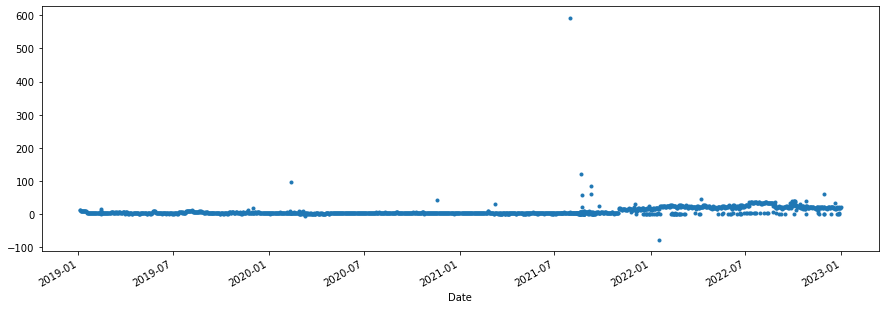

In [88]:
df['Value'].plot(style='.',figsize=(15, 5))

<AxesSubplot:xlabel='Value'>

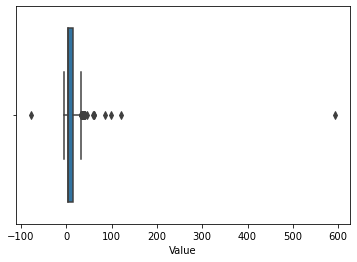

In [89]:
sns.boxplot(df['Value'],data=df)

In [90]:
Q1 =  df['Value'].quantile(0.25)
Q3 =  df['Value'].quantile(0.75)
IQR = Q3 - Q1
df_outliers = df[(df['Value'] < Q1 - 1.5*IQR) | (df['Value'] > Q3 + 1.5*IQR)]
print(df_outliers.shape)
df_outliers.head()

(59, 2)


,isCovid,Value
Date,,
2020-02-12 07:00:00,0,98.38
2020-11-18 12:00:00,1,41.37
2021-07-30 12:45:00,0,593.23
2021-08-21 08:30:00,0,121.46
2021-08-21 19:30:00,0,58.69


In [91]:
df['Value']=np.where((df['Value'] < Q1 - 1.5*IQR) | (df['Value'] > Q3 + 1.5*IQR),df['Value'].median(),df['Value'])
print(df.shape)
df.head(5)

(1676, 2)


,isCovid,Value
Date,,
2019-01-04,0,13.620000
2019-01-05,0,13.730000
2019-01-06,0,8.690000
2019-01-07,0,8.540000
2019-01-08,0,8.713333


<AxesSubplot:xlabel='Date'>

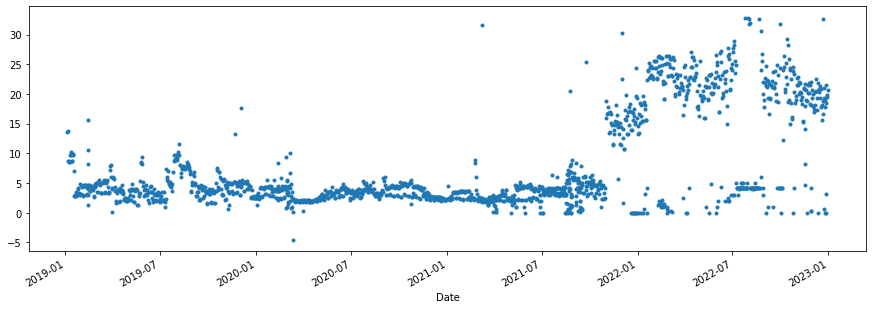

In [92]:
df['Value'].plot(style='.',figsize=(15, 5))

<AxesSubplot:xlabel='Value'>

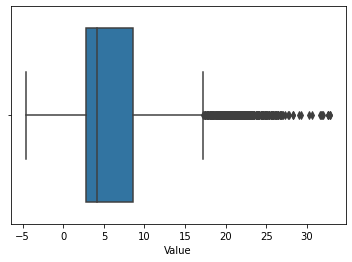

In [93]:
sns.boxplot(df['Value'],data=df)

In [94]:

df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['year'] = df.index.year
print(df.shape)
df.head(5)

(1676, 5)


,isCovid,Value,quarter,month,year
Date,,,,,
2019-01-04,0,13.620000,1,1,2019
2019-01-05,0,13.730000,1,1,2019
2019-01-06,0,8.690000,1,1,2019
2019-01-07,0,8.540000,1,1,2019
2019-01-08,0,8.713333,1,1,2019


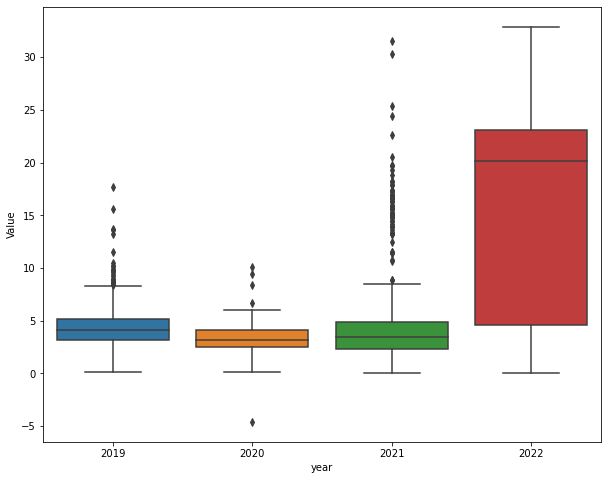

In [95]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='year', y='Value')
ax.set_title('')
plt.show()

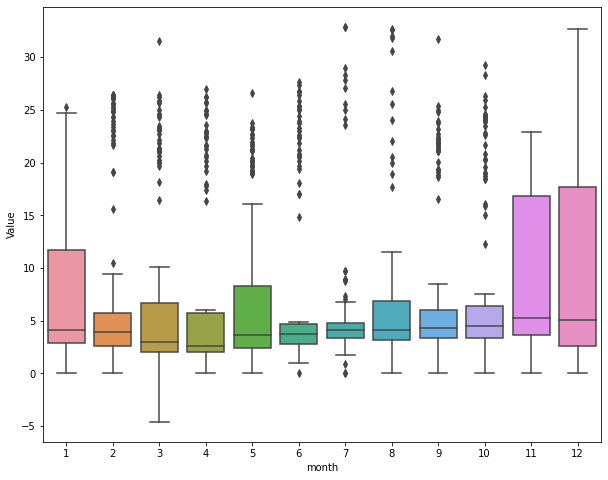

In [96]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='Value')
ax.set_title('')
plt.show()

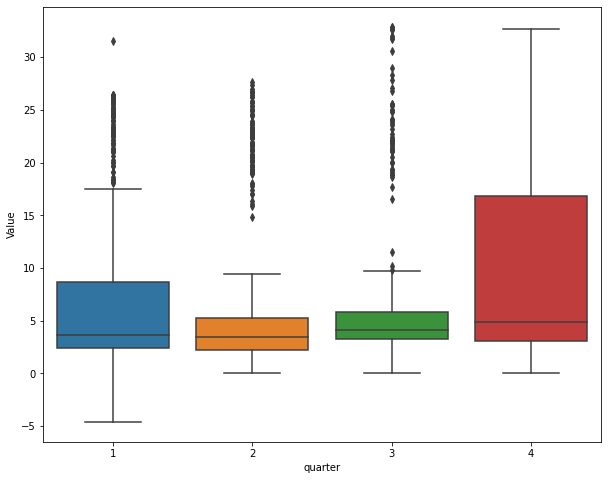

In [97]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='quarter', y='Value')
ax.set_title('')
plt.show()

In [98]:
df[['quarter','month','Value']].groupby(['quarter','month']).sum().reset_index()


,quarter,month,Value
0,1,1,983.079065
1,1,2,1109.317179
2,1,3,1056.757815
3,2,4,918.585165
4,2,5,981.090545
5,2,6,1013.810135
6,3,7,799.443017
7,3,8,1040.783924
8,3,9,1061.946869
9,4,10,1045.833005


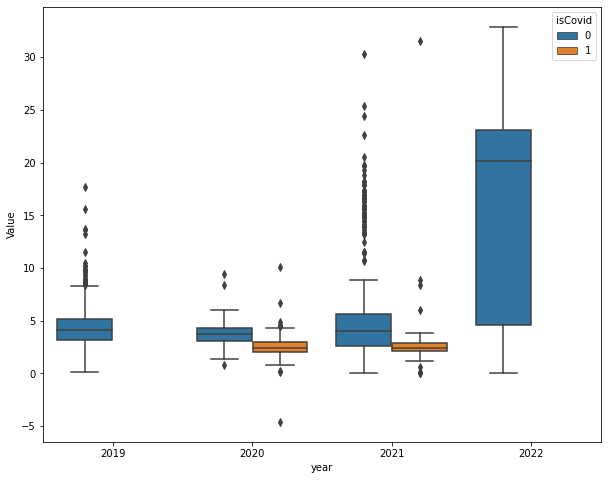

In [99]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='year', y='Value',hue='isCovid')
ax.set_title('')
plt.show()

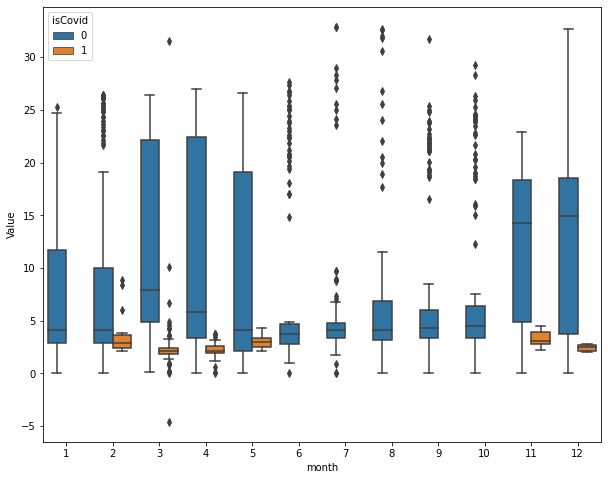

In [100]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='Value',hue='isCovid')
ax.set_title('')
plt.show()

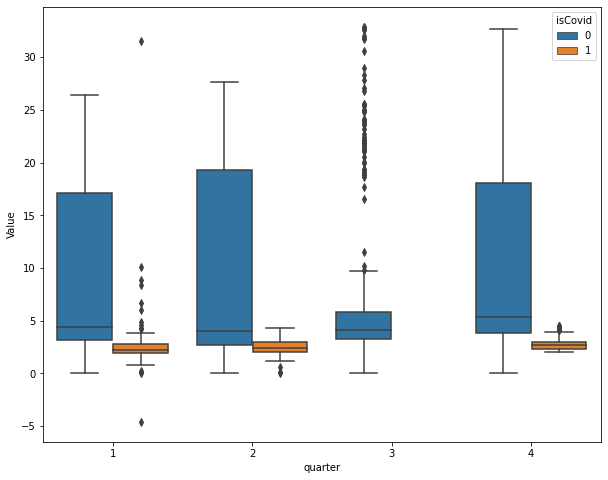

In [101]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='quarter', y='Value',hue='isCovid')
ax.set_title('')
plt.show()